In [1]:
#b124323d18db5eb6fc001390c6b008203f42df1d228338db9fcd399e492623ea4fbe4249a80bc6b6dc051aaca552ff717386c97c5ebab8c74e47ec1198b764be

In [29]:
import qiskit as q
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

#IBMQ.save_account("b124323d18db5eb6fc001390c6b008203f42df1d228338db9fcd399e492623ea4fbe4249a80bc6b6dc051aaca552ff717386c97c5ebab8c74e47ec1198b764be")
IBMQ.load_account()
%matplotlib inline

ibmqfactory.load_account:WARNING:2020-07-10 22:24:30,483: Credentials are already in use. The existing account in the session will be replaced.


In [28]:
provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queueed and {qubit_count} qubits remaining")

ibmq_qasm_simulator has 1 queueed and simulated qubits remaining
ibmqx2 has 1 queueed and 5 qubits remaining
ibmq_16_melbourne has 22 queueed and 15 qubits remaining
ibmq_vigo has 18 queueed and 5 qubits remaining
ibmq_ourense has 29 queueed and 5 qubits remaining
ibmq_london has 2 queueed and 5 qubits remaining
ibmq_burlington has 0 queueed and 5 qubits remaining
ibmq_essex has 9 queueed and 5 qubits remaining
ibmq_armonk has 14 queueed and 1 qubits remaining


In [16]:
circuit = q.QuantumCircuit(2, 2) # 2 qbits and 2 classical bits
circuit.x(0) # 0,0 -> 1,0 NOT gate operation
circuit.cx(0, 1) # cx --> controlled not flips the value only if the previous value is one; therefore 0, 1 -> 1, 1
circuit.measure([0, 1], [0, 1])

In [17]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [30]:
backend = provider.get_backend('ibmq_burlington')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [31]:
from qiskit.visualization import plot_histogram

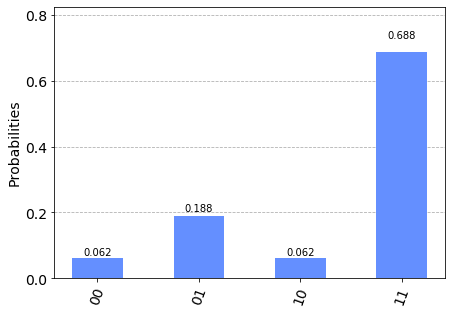

In [35]:
from matplotlib import style
#style.use("dark background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)

In [36]:
circuit = q.QuantumCircuit(2, 2) # 2 qbits and 2 classical bits
circuit.h(0) # 0,0 -> 1,0 NOT gate operation
circuit.cx(0, 1) # cx --> controlled not flips the value only if the previous value is one; therefore 0, 1 -> 1, 1
circuit.measure([0, 1], [0, 1])

In [37]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [38]:
backend = provider.get_backend('ibmq_burlington')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


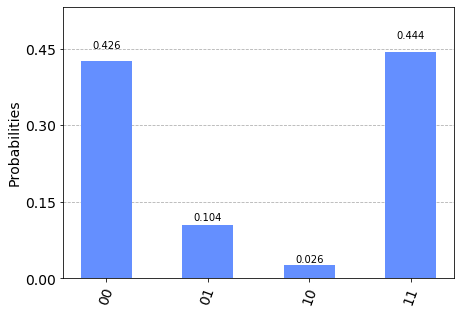

In [39]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)